In [17]:

# 1. 부산 기온 데이터 수집

# 2. 부산에서 가장 더웠던 날 검색

# 3. 매년 크리스마스의 최고기온과 최저 기온 추이 : Plot

# 4. 월별 기온 데이터: boxplot

In [15]:
# 1. 부산 기온 데이터 수집
!pip install matplotlib

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('./data/busan.csv')
df.head(10)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9
5,1904-04-14,159,9.4,8.6,16.0
6,1904-04-15,159,8.8,7.4,10.5
7,1904-04-16,159,9.2,6.7,11.3
8,1904-04-17,159,10.3,NaN,12.6
9,1904-04-18,159,11.7,9.0,NaN


In [8]:
df.isnull().sum()

날짜          0
지점          0
평균기온(℃)     0
최저기온(℃)    10
최고기온(℃)     4
dtype: int64

In [9]:
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

In [10]:
df.dropna(axis=0)

,날짜,지점,평균기온,최저기온,최고기온
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9
5,1904-04-14,159,9.4,8.6,16.0
...,...,...,...,...,...
43259,2022-09-16,159,25.1,22.5,29.2
43260,2022-09-17,159,25.8,23.2,30.4
43261,2022-09-18,159,26.4,23.0,31.0
43262,2022-09-19,159,24.1,19.0,28.8


In [11]:
hot_df = df[['날짜','최고기온']]

In [12]:
# 3. 매년 크리스마스의 최고기온과 최저 기온 추이 : Plot
cold_df = df[['날짜','최저기온']]


In [13]:
hot_mas_df = hot_df[df['날짜'].str.contains('-12-25')]
cold_mas_df = cold_df[df['날짜'].str.contains('-12-25')]

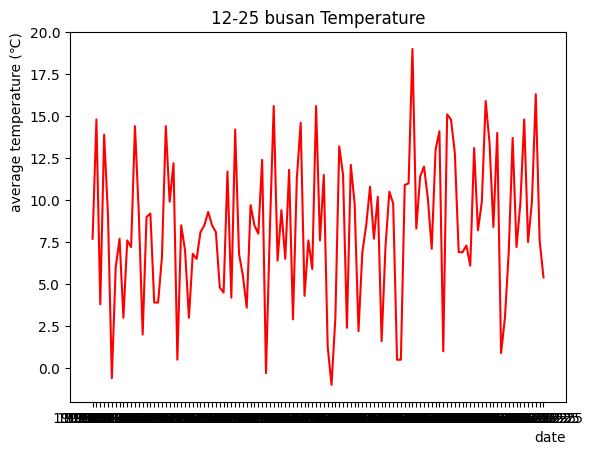

In [14]:
plt.plot(hot_mas_df['날짜'],hot_mas_df['최고기온'],color = 'red')
plt.title('12-25 busan Temperature')
plt.xlabel('date', loc='right')
plt.ylabel('average temperature (℃)', loc='top')
plt.show()


Text(0, 1, 'average temperature (℃)')

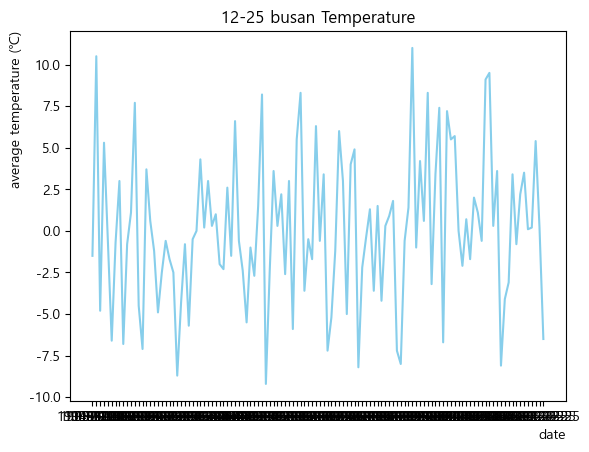

In [22]:
plt.plot(cold_mas_df['날짜'],cold_mas_df['최저기온'], color= 'skyblue')
plt.title('12-25 busan Temperature')
plt.xlabel('date', loc='right')
plt.ylabel('average temperature (℃)', loc='top')

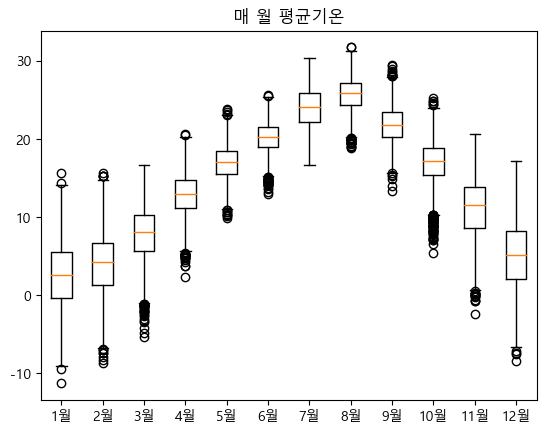

In [19]:
# 4. 월별 기온 데이터: boxplot
box = []
list = []
df['날짜'] = df['날짜'].astype('datetime64')
df['월'] = df['날짜'].dt.month
for n in range(1,13):   
    box.append(df[df['월'] == n]['평균기온'])
    list.append(f'{n}월')
plt.rc('font',family='Malgun Gothic')      
plt.rcParams['axes.unicode_minus']=False 
plt.title('매 월 평균기온')
plt.boxplot(box)
plt.xticks(range(1,13), list)
plt.show()